# Visual story telling part 1: green buildings

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read the dataset
greenbuildings = pd.read_csv('greenbuildings.csv')
greenbuildings.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [3]:
# Creating more readable building class column
greenbuildings['class'] = greenbuildings.apply(
    lambda row: 'Class A' if row['class_a'] == 1 else ('Class B' if row['class_b'] == 1 else 'Class C'),
    axis=1
)

# Creating a more readable energy type column 
greenbuildings['green_class'] = greenbuildings.apply(
    lambda row: 'LEED' if row['LEED'] == 1 else ('Energy Star' if row['Energystar'] == 1 else 'Non_green'),
    axis=1
)

greenbuildings['net'] = greenbuildings.apply(
    lambda row: 'net' if row['net'] == 1 else 'non-net',
    axis=1
)

## General Analysis

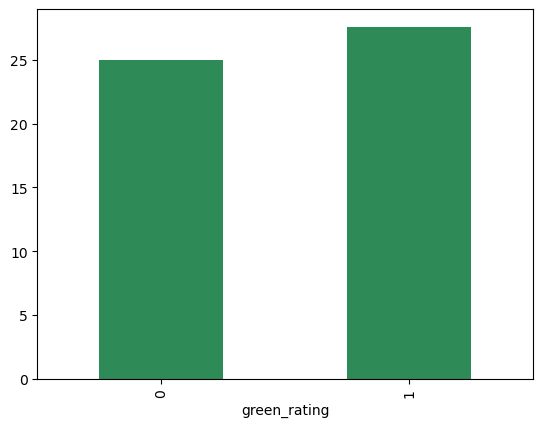

In [4]:
greenbuildings.groupby('green_rating')['Rent'].agg('median').plot(kind='bar', color = 'seagreen')
plt.show()

#### When looking at the median the difference is less, however the median rent for green buildings is slightly higher. It is only about $2.60 more per square foot.

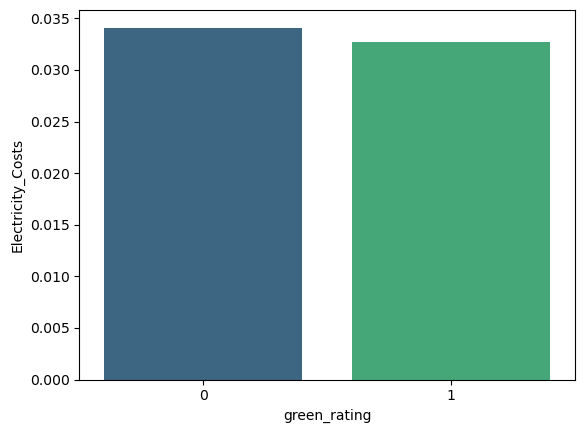

In [5]:
y_elec_costs = greenbuildings.groupby('green_rating')['Electricity_Costs'].agg('median')
sns.barplot(x='green_rating', y=y_elec_costs, data=greenbuildings, palette='viridis')
plt.show()

#### The electricity costs are slightly lower for green buildings than for non-green buildings.

<AxesSubplot:xlabel='green_rating', ylabel='Rent'>

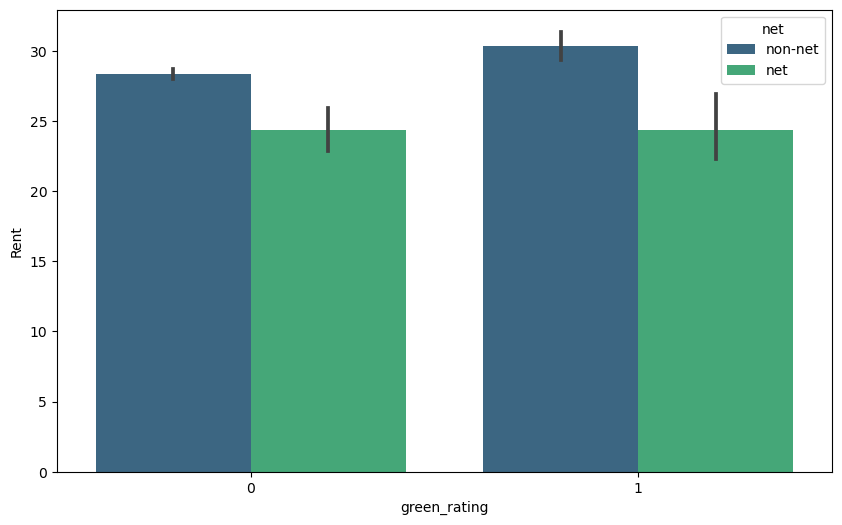

In [6]:
net_value = greenbuildings.groupby('net')['Rent'].agg('median').reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='green_rating', y='Rent', hue='net', data=greenbuildings, palette='viridis')

#### The median rent is relatively the same for net contract residents in green buildings and non-green buildings by net.

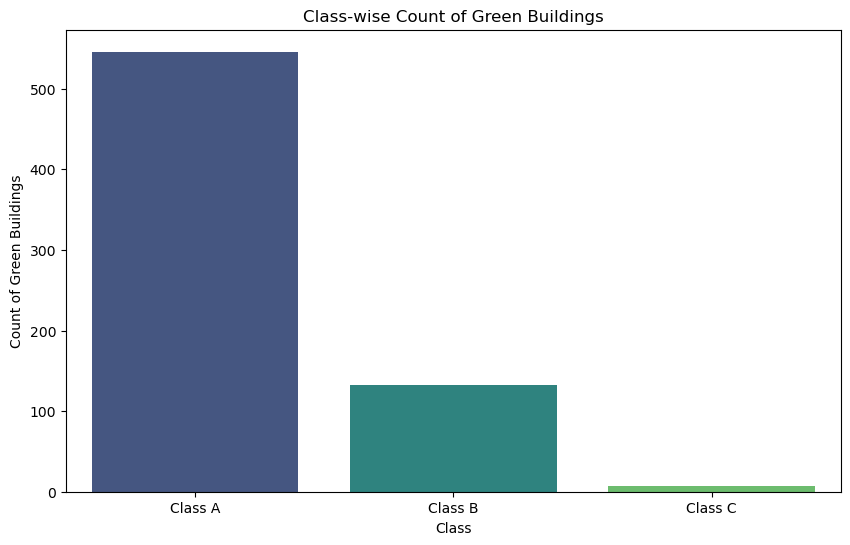

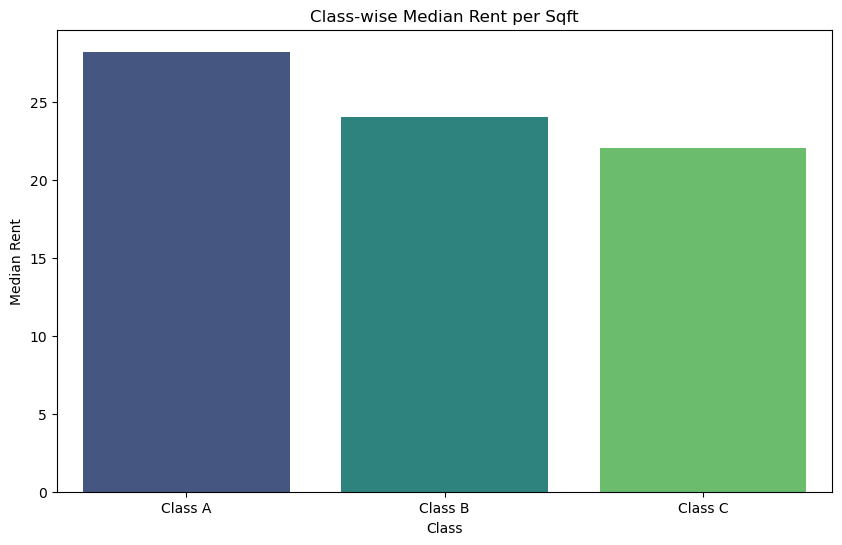

In [7]:
# Taking a look at median rent in terms of building class

green2 = greenbuildings.groupby('class').agg(
    meanrent=pd.NamedAgg(column='Rent', aggfunc='median'),
    green_buildings_count=pd.NamedAgg(column='green_rating', aggfunc=lambda x: (x == 1).sum()),
    countof=pd.NamedAgg(column='Rent', aggfunc='size')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='green_buildings_count', data=green2, palette='viridis')

# Add labels and title
plt.title('Class-wise Count of Green Buildings')
plt.ylabel('Count of Green Buildings')
plt.xlabel('Class')

# Show the plot
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='meanrent', data=green2, palette='viridis')

# Add labels and title
plt.title('Class-wise Median Rent per Sqft')
plt.ylabel('Median Rent')
plt.xlabel('Class')

# Show the plot
plt.show()

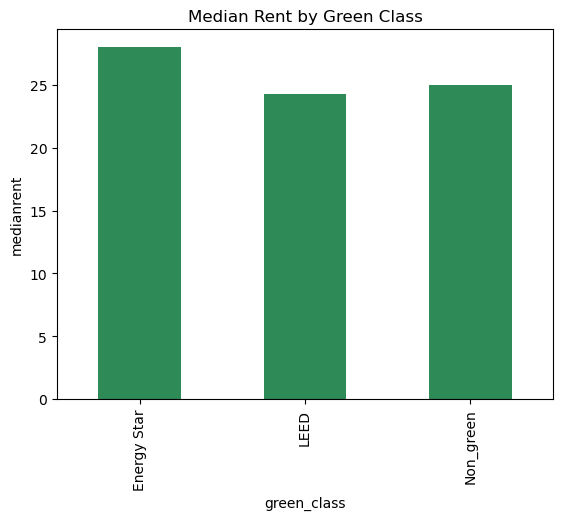

In [8]:
greenbuildings.groupby('green_class')['Rent'].agg('median').plot(kind='bar', color ='seagreen')
plt.title('Median Rent by Green Class')
plt.ylabel('medianrent')
plt.show()

#### Following the steps of the 'excel stats guru' that the developer hired, running the numbers, it does not seem off the bat that this is a sound decision.

#### I subsetted greenbuilding into one dataframe with buildings that have green ratings and one dataframe with buildings that do not have green ratings.

In [9]:
green = greenbuildings[greenbuildings['green_rating'] == 1]
non_green = greenbuildings[greenbuildings['green_rating'] == 0]

#### To compare the key statistics of each column between the two dataframes, I computed the differences between the two type of buildings.

In [10]:
green.describe() - non_green.describe()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,Energystar,green_rating,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
count,-6524.00000,-6524.000000,-6.524000e+03,-6462.000000,-6524.000000,-6524.000000,-6524.000000,-6524.000000,-6524.000000,-6524.000000,...,-6524.000000,-6524.0,-6524.000000,-6524.000000,-6524.000000,-6524.00000,-6524.000000,-6524.000000,-6524.000000,-6524.000000
mean,-59096.51553,37.537143,9.980405e+04,0.328085,1.749252,7.309836,1.911284,-25.622077,-0.182200,0.434894,...,0.931387,1.0,0.219447,214.843550,-698.918540,-484.07499,-2.066485,-0.000264,0.000682,-0.663206
std,-278936.21053,-7.433980,-7.054193e+03,1.558481,-2.304056,-9.645048,1.105212,-16.910216,-0.079133,-0.078198,...,0.252980,0.0,-0.054155,128.086711,-88.391164,-31.67961,-0.643787,-0.000531,-0.000783,-0.954995
min,2882.00000,0.000000,8.936000e+03,0.000000,5.890000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,91.000000,0.000000,0.00000,0.000000,0.000013,-0.000019,0.000000
25%,89676.00000,25.000000,7.395700e+04,0.030000,2.320000,8.350000,1.000000,-6.000000,0.000000,1.000000,...,1.000000,1.0,0.000000,0.000000,0.000000,-766.00000,0.000000,0.000004,0.000200,-0.370000
50%,-32799.00000,15.000000,1.224540e+05,0.410000,2.600000,3.750000,1.000000,-15.000000,0.000000,1.000000,...,1.000000,1.0,0.000000,-45.000000,-1069.000000,-563.00000,-0.450000,0.000004,0.001363,0.245000
75%,-45948.00000,3.000000,1.380350e+05,0.590000,1.500000,1.420000,2.000000,-54.000000,-1.000000,0.000000,...,1.000000,1.0,0.000000,193.000000,-695.000000,-838.00000,-3.190000,-0.000016,-0.000008,-1.875000
max,-33941.00000,0.000000,-2.059803e+06,0.000000,-111.930000,0.000000,-34.000000,-71.000000,0.000000,0.000000,...,1.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000014,0.000022,0.000000


#### From this table we can see that on average, green buildings have a lower percentage of occupency, are younger, and have higher cooling days （i.e. there is a larger demand of cooling) and less heating days (i.e. there is a smaller demand of heating). Notably, mthere is a huge difference in the average size of green buildings and non-green buildings.

#### This summary table also indicates that there is a \\$2.6 per square foot difference in the median of Rent and a \\$1.75 per square foot difference in the mean of Rent. This confirms the conclusion about general rent differences made by the real-estate developer's staff.

#### Below is a box-plot of Rent the type of buildings.

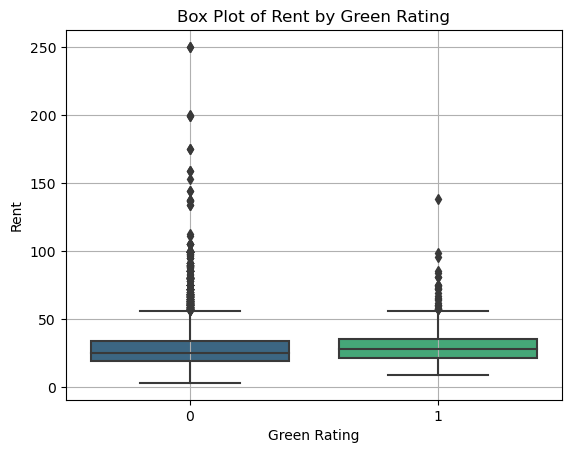

In [11]:
sns.boxplot(x='green_rating', y='Rent', data=greenbuildings, palette='viridis')

plt.title('Box Plot of Rent by Green Rating')
plt.xlabel('Green Rating')
plt.ylabel('Rent')
plt.grid(True)
plt.show()


#### There seem to be many outliers in the rent amounts of non-green buildings. To improve the visibility of the plot, I removed any buildings with a rent higher than 80. 

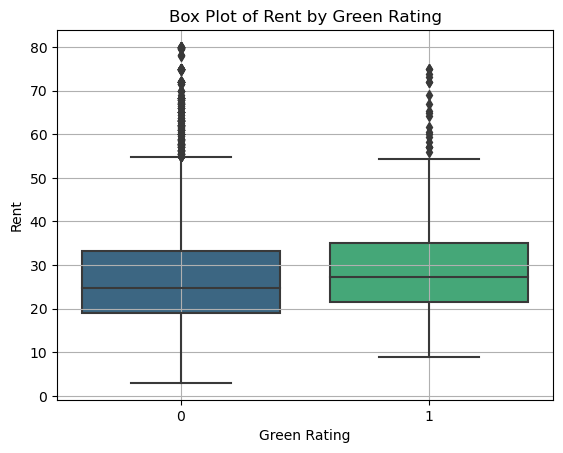

In [12]:
rent_filter = greenbuildings[greenbuildings['Rent'] <= 80]
sns.boxplot(x='green_rating', y='Rent', palette='viridis', data=rent_filter)

plt.title('Box Plot of Rent by Green Rating')
plt.xlabel('Green Rating')
plt.ylabel('Rent')
plt.grid(True)
plt.show()

#### The box-plot confirms my statement based on the statistics of the summary table above. Thus, the staff was right about the \\$2.6 per square foot difference between green buildings and non-green buildings.

### Size and Story Comparisons

#### However, to test which he was right about extra revenues on a building with 250,000 square feet, we have to look at buildings with similar sizes specifically. To do so, I would like to explore rent differences based on building sizes. Since the dataset does seem to contain many outliers, as shown from the boxplots above, I would agree with the developer's staff that the median is a more appropriate metric for rent comparisons.

In [13]:
# Bin building sizes
bin_edges = [0, 100000, 200000, 300000, 400000, float('inf')]
bin_labels = ['< 100,000', '100,000-200,000', '200,000-300,000','300,000 - 400,000', '>400,000']
building_size = greenbuildings.copy()

building_size['size_binned'] = pd.cut(building_size['size'], bins=bin_edges, labels=bin_labels, right=False)

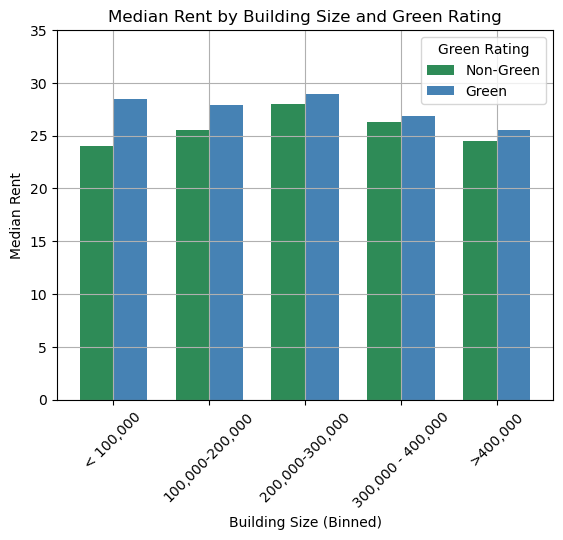

In [14]:
rent_by_building_size =  building_size.groupby(['size_binned','green_rating'])['Rent'].median().unstack()

index = np.arange(len(rent_by_building_size.index))
bar_width = 0.35

plt.bar(index, rent_by_building_size[0], bar_width, color = 'seagreen',label='Non-Green Buildings')
plt.bar(index + bar_width, rent_by_building_size[1], bar_width, color = 'steelblue', label='Green Buildings')

plt.title('Median Rent by Building Size and Green Rating')
plt.xlabel('Building Size (Binned)')
plt.ylabel('Median Rent')
plt.legend(title='Green Rating', labels=['Non-Green', 'Green'])
plt.xticks(index + bar_width / 2, rent_by_building_size.index, rotation=45)
plt.grid(True)
plt.ylim(0, 35)
plt.show()

In [15]:
# calculate the difference in mean
size_250000 = greenbuildings[(greenbuildings['size'] >= 200000) & (greenbuildings['size'] <= 300000)]
median_difference = size_250000[size_250000['green_rating'] == 1]['Rent'].median() \
- size_250000[size_250000['green_rating'] == 0]['Rent'].median()
print('Median Difference in average rent between green-buildings and non-green buildings ' \
      f"for houses with sizes ranging from 200,000 to 300,000 square feet: ${median_difference:.2f}")

Median Difference in average rent between green-buildings and non-green buildings for houses with sizes ranging from 200,000 to 300,000 square feet: $0.87


#### Although the difference in median rent between green and non-green building is \\$2.6, this difference is significantly reduced to \\$0.87 when we only look at houses with sizes between 200,000 and 300,000. This suggests that if the rea-estate developer plan to build a \\$250,000 square feet building, the revenue difference between a green and a non-green option isn't that huge.

#### Since the developer plans to build a 15-stories building, I would also like to compare the rents of buildings with similar heights.

In [16]:
greenbuildings.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent,class,green_class
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,4988,58,5046,42.57,0.013700,0.029000,36.78,Class A,Energy Star
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,1,4988,58,5046,42.57,0.013731,0.029045,36.78,Class B,Non_green
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,1,4988,58,5046,42.57,0.013731,0.029045,36.78,Class B,Non_green
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,4988,58,5046,42.57,0.013731,0.029045,36.78,Class B,Non_green
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,1,4988,58,5046,42.57,0.013731,0.029045,36.78,Class A,Non_green


In [17]:
rent_by_stories = greenbuildings[(greenbuildings['stories'] >= 10) & (greenbuildings['stories'] <= 20)]
rent_by_stories = rent_by_stories.groupby(['stories','green_rating'])['Rent'].median().unstack()

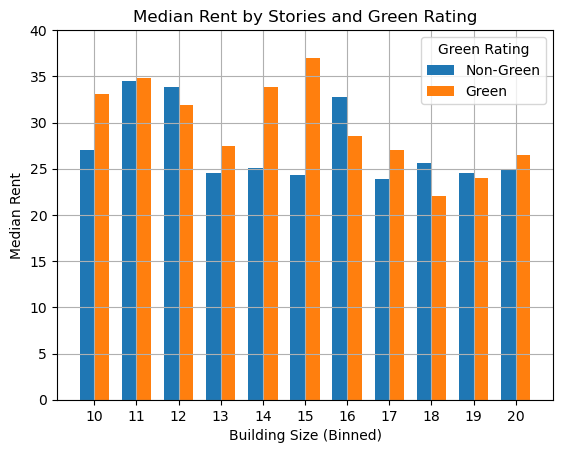

In [18]:
index = np.arange(len(rent_by_stories.index))
bar_width = 0.35

plt.bar(index, rent_by_stories[0], bar_width,label='Non-Green Buildings')
plt.bar(index + bar_width, rent_by_stories[1], bar_width, label='Green Buildings')

plt.title('Median Rent by Stories and Green Rating')
plt.xlabel('Building Size (Binned)')
plt.ylabel('Median Rent')
plt.legend(title='Green Rating', labels=['Non-Green', 'Green'])
plt.xticks(index + bar_width / 2, rent_by_stories.index, rotation=0)
plt.grid(True)
plt.ylim(0, 40)
plt.show()

#### The difference of rents between green buildings and non-green buildings in buildings with 15 stories is significant. The median rent of green buildings with 15 stories is more than \\$15 higher than non-green alternatives. However, the variance of differences in median rent is also high. Thus, we cannot make any straight conclusions from this plot.

### Comparisons with Neighboring Buildings

#### Furthermore, to compare the rent difference between green and non-green buildings, I want to look at whether green buildings have higher rent rates than the average rent rate in their communities, which is measured by cluster_rent. I will also only focus on buildings with sizes ranging from 200,000 to 300,000 square feet.

In [19]:
size_250000['cluster_difference'] = size_250000['Rent'] - size_250000['cluster_rent']

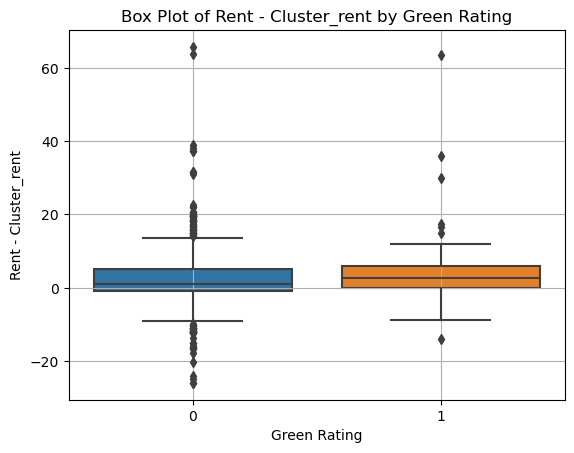

In [20]:
sns.boxplot(x='green_rating', y='cluster_difference', data=size_250000)

plt.title('Box Plot of Rent - Cluster_rent by Green Rating')
plt.xlabel('Green Rating')
plt.ylabel('Rent - Cluster_rent')
plt.grid(True)
plt.show()

#### Although the median was higher for green buildings--suggesting that in general green buildings have higher rent compared to their pairs in the same community than non-green buildings, non-green buildings have a larger variance. Thus, the difference is not significant. <br><br><br>

#### Conclusion: Constructing a green building is not the only factor to consider when thinking about profitability. While the stats guru was correct in the fact that green buildings will generate more revenue, they only looked at whether or not the building was green. Other predictors that had an impact include whether a net contract is signed, building amenties, and having tenants pay for electric costs rather than building it into the rent. Finally, it is clear based on this final graph that a green building certified with Energy Star has a higher median rent than even green buildings with LEED. If a green building is to be built, it should be certified with Energy Star. 